In [1]:
#importamos las librerias
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
#importamos el conjunto de datos de entrenamiento y el de prueba
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#revision del conjunto de datos
print("tamano del dataset de entrenamiento", train.shape)
print("tamano del dataset de prueba", test.shape)

tamano del dataset de entrenamiento (1460, 81)
tamano del dataset de prueba (1459, 80)


In [4]:
#vista rapida del dataset de entrenamiento
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Exploracion de los datos
train.info()
train.describe()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
display(train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


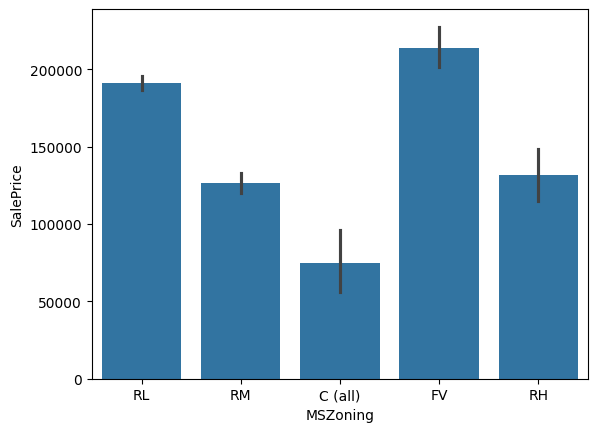

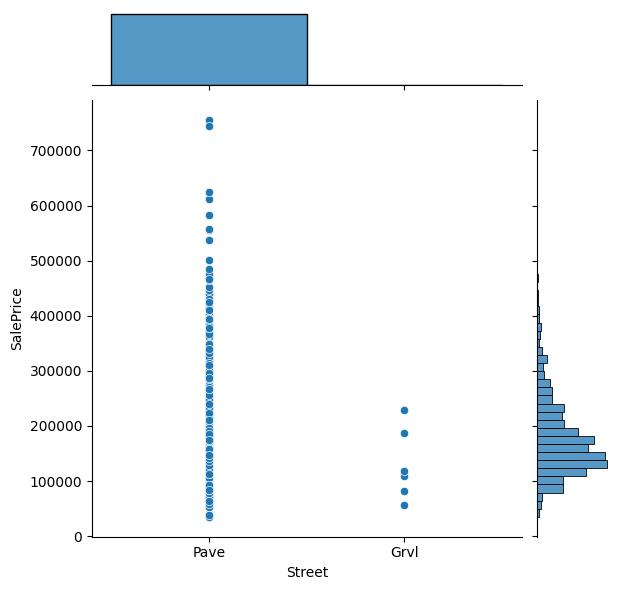

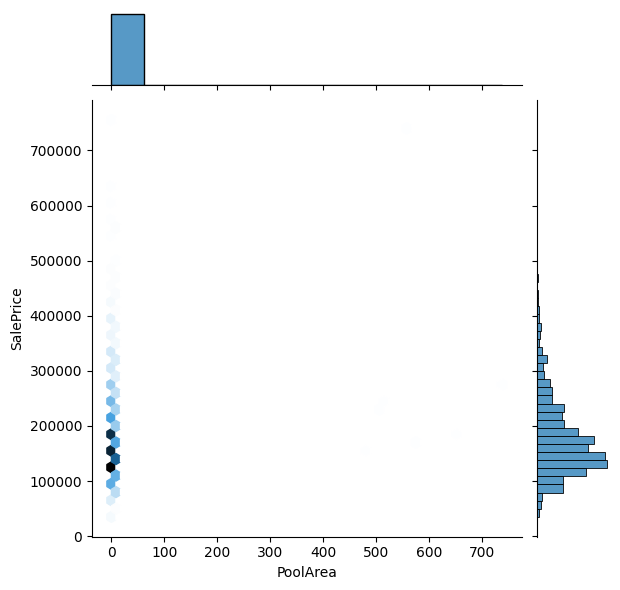

In [7]:
#Analisis de datos
sns.barplot(x='MSZoning',y='SalePrice',data=train)
sns.jointplot(x='Street',y='SalePrice',data=train,)
sns.jointplot(x='PoolArea', y='SalePrice', data=train, kind='hex')


In [8]:
#probar con pocas columnas
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF"]
X = train[features]
y = train['SalePrice']

In [9]:
#dividir datos y entrenar
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
#acerca del modelo
print(model.coef_[0], "+", model.intercept_)

23766.297562454703 + -94422.1245122955


In [11]:
#nuevos datos
#features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF"]
new_data = pd.DataFrame(test[features])
#new_data.to_csv("entrenamientoparcial.csv",index=False)
new_data.head()
display(new_data.head())
new_data.isnull().sum()
#prediccion = model.predict(new_data)
#print(prediccion)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF
0,5,896,1.0,882.0
1,6,1329,1.0,1329.0
2,5,1629,2.0,928.0
3,6,1604,2.0,926.0
4,8,1280,2.0,1280.0


OverallQual    0
GrLivArea      0
GarageCars     1
TotalBsmtSF    1
dtype: int64